In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

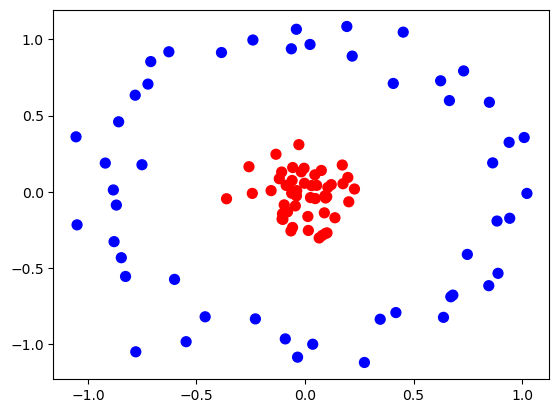

In [8]:
from sklearn.datasets import make_circles

X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [12]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4

In [16]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\Kavtech\AppData\Local\Temp\ipykernel_11884\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


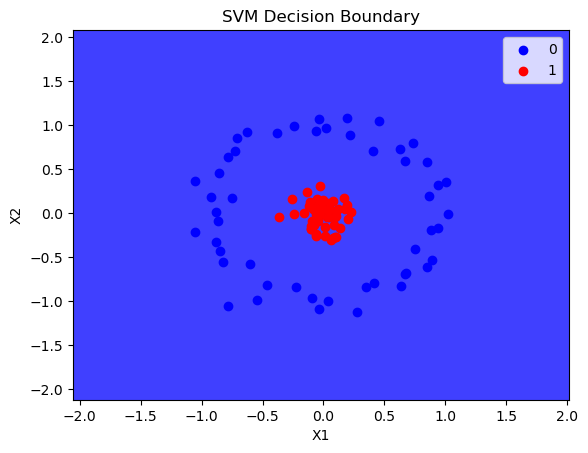

In [18]:
plot_decision_boundary(X, y, classifier)

In [20]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

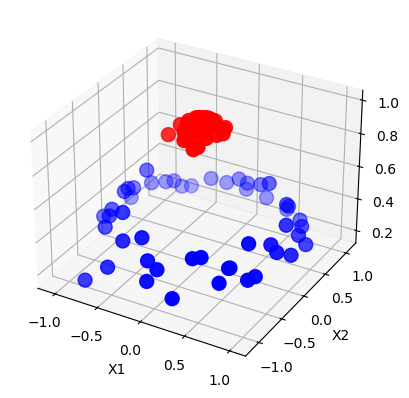

In [24]:
plot_3d_plot(X,y)

In [42]:
rbf_classifier = SVC(kernel="poly", degree=4)
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [44]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\Kavtech\AppData\Local\Temp\ipykernel_11884\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


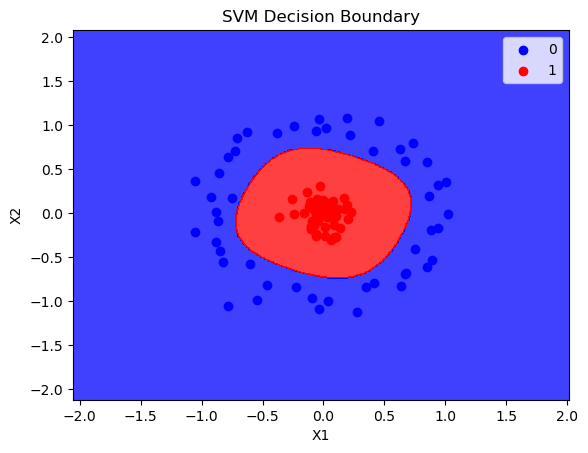

In [46]:
plot_decision_boundary(X, y, rbf_classifier)

In [28]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

C:\Users\Nitish\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [29]:
accuracy_score(y_test, y_pred)

1.0

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


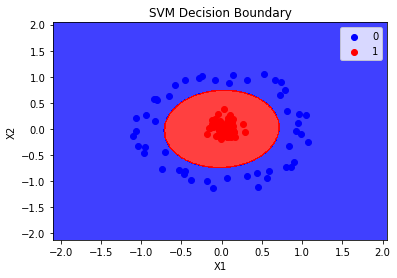

In [30]:
plot_decision_boundary(X, y, poly_classifier)

In [50]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'poly', 'sigmoid']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.562 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.562 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.500 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.500 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.500 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.562 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

In [52]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=0.1, gamma=1)


In [54]:
X

array([[-0.25825688,  0.164094  ],
       [ 0.09470989, -0.04109862],
       [ 0.09177299, -0.02720943],
       [-0.00441437,  0.15394721],
       [-0.05747556, -0.23448803],
       [-0.0909437 , -0.96546744],
       [ 0.09405662, -0.2739308 ],
       [-0.75118373,  0.17706174],
       [-0.03845186,  0.00722   ],
       [-0.24292936, -0.01099941],
       [-0.10182596, -0.18110325],
       [ 0.34625084, -0.83655034],
       [-0.3616308 , -0.04615263],
       [ 0.62463898,  0.72766675],
       [-0.38493142,  0.91320511],
       [-0.00255297,  0.05540959],
       [ 0.12071356,  0.04649693],
       [ 0.94019869,  0.32391029],
       [-0.8692164 , -0.08755321],
       [-1.05017562, -0.21730467],
       [-0.10581662, -0.17906212],
       [-0.6272755 ,  0.91799747],
       [ 0.86442712,  0.18922987],
       [ 0.67152404, -0.68918665],
       [-0.88300655,  0.01154875],
       [ 0.88902073, -0.53537973],
       [ 0.06515637, -0.30324524],
       [ 0.03539501, -1.00053853],
       [ 0.01297154,

In [56]:
np.exp(-(X**2)).sum(1)

array([1.90891142, 1.98938248, 1.99087301, 1.9765594 , 1.9432017 ,
       1.38547859, 1.91890052, 1.53790671, 1.99847042, 1.94257196,
       1.95741869, 1.38369477, 1.87528576, 1.26583916, 1.2966157 ,
       1.99692797, 1.98337426, 1.31353648, 1.46212196, 1.28579376,
       1.95731063, 1.10524663, 1.43850038, 1.25892477, 1.45840993,
       1.20447079, 1.9079074 , 1.3662313 , 1.97379636, 1.31758908,
       1.24213918, 1.4151006 , 1.92361041, 1.19486161, 1.23892783,
       1.26024489, 1.9719118 , 1.97192954, 1.34201315, 1.96851384,
       1.9921856 , 1.41618093, 1.98280393, 1.12007678, 1.99103184,
       1.12057406, 1.21304329, 1.9524183 , 1.99769923, 1.20696161,
       1.42114731, 1.3192876 , 1.17283519, 1.41122098, 1.19988339,
       1.35942992, 1.98344161, 1.39269638, 1.91474027, 1.27239368,
       1.90818007, 1.93180041, 1.98575935, 1.21184452, 1.98821316,
       1.39414838, 1.99749188, 1.976212  , 1.31529741, 1.30671898,
       1.9894051 , 1.14927955, 1.94917561, 1.31956419, 1.99074

In [58]:
X_new=np.exp(-(X**2))

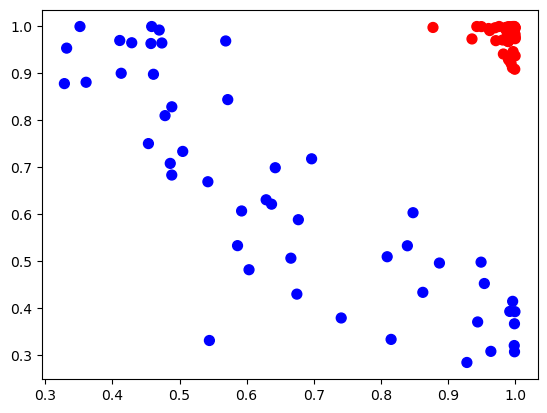

In [60]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')